<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Datenanalyse_Test_Selina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import gdown

#https://drive.google.com/file/d/1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU/view?usp=drive_link

# Die Datei-ID aus dem Google Drive-Link
file_id = '1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU'
destination = '/content/Datensatz_komplett.csv'

# Datei herunterladen
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU
From (redirected): https://drive.google.com/uc?id=1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU&confirm=t&uuid=ac6b9212-e0b5-42c8-9a37-be19b633ecf3
To: /content/Datensatz_komplett.csv
100%|██████████| 1.74G/1.74G [00:25<00:00, 68.5MB/s]


'/content/Datensatz_komplett.csv'

In [ ]:
# Lade die heruntergeladene CSV-Datei
df_raw = pd.read_csv('/content/Datensatz_komplett.csv')
# Zeige die ersten paar Zeilen der Datei an
display(df_raw.head(5))
display(df_raw.info())
display(df_raw.shape())
display(df_raw.describe())

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
8           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
9           12                    Glattpark  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] WETTERSTATION  \
0  2024-01-01 04:37:09               REAL             69.0        NABZUE   
1  2024-01-01 04:38:08               REAL             68.0        NABZUE   
2  2024-01-01 04:39:12 

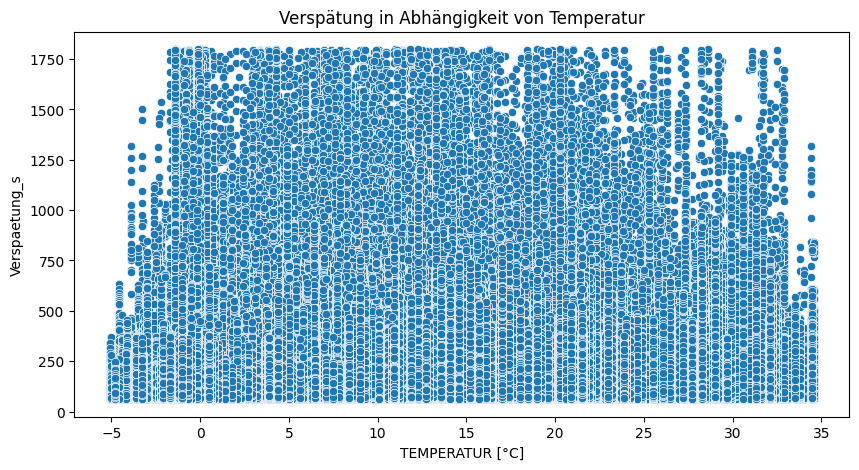

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_raw, x='TEMPERATUR [°C]', y='Verspaetung_s')
plt.title("Verspätung in Abhängigkeit von Temperatur")
plt.show()

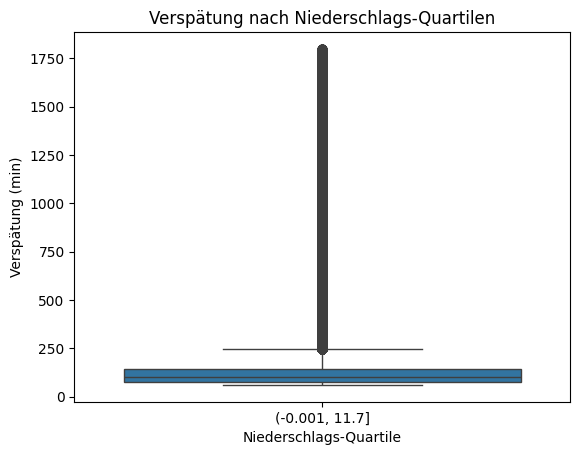

In [ ]:
df_raw['Regen_Quartile'] = pd.qcut(df_raw['NIEDERSCHLAG [mm]'], 4, duplicates='drop') #Niederschlagswerte werden in 4 Gruppen (Quartile) unterteilt. Gruppenbildung ist abhängig von dem Datensatz

sns.boxplot(x='Regen_Quartile', y='Verspaetung_s', data=df_raw)
plt.title("Verspätung nach Niederschlags-Quartilen")
plt.xlabel("Niederschlags-Quartile")
plt.ylabel("Verspätung (min)")
plt.show()

# ⚠️ Wieso in 4 Quartile unterteilen? Boxplot macht das selber

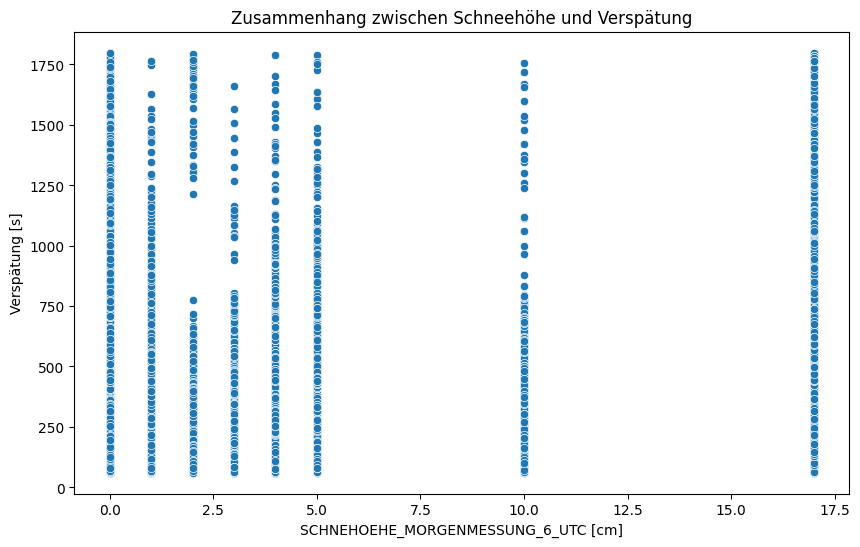

In [ ]:
# Erstelle das Streudiagramm
plt.figure(figsize=(10,6))  # Optional: Bildgröße anpassen
sns.scatterplot(data=df_raw, x='SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm]', y='VERSPAETUNG [s]')

# Achsenbeschriftungen hinzufügen
plt.title('Zusammenhang zwischen Schneehöhe und Verspätung')
plt.xlabel('SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm]')
plt.ylabel('Verspätung [s]')

# Zeige die Grafik an
plt.show()

In [ ]:
#KMeans versucht, die Daten in 3 Gruppen (Cluster) zu unterteilen.
#Der Algorithmus sucht dabei nach Mustern und Ähnlichkeiten in den Datenpunkten, um sie in Cluster zu gruppieren.
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df_clustered['Cluster'] = clusters
#

#⚠️ df_clustered haben wir nicht!

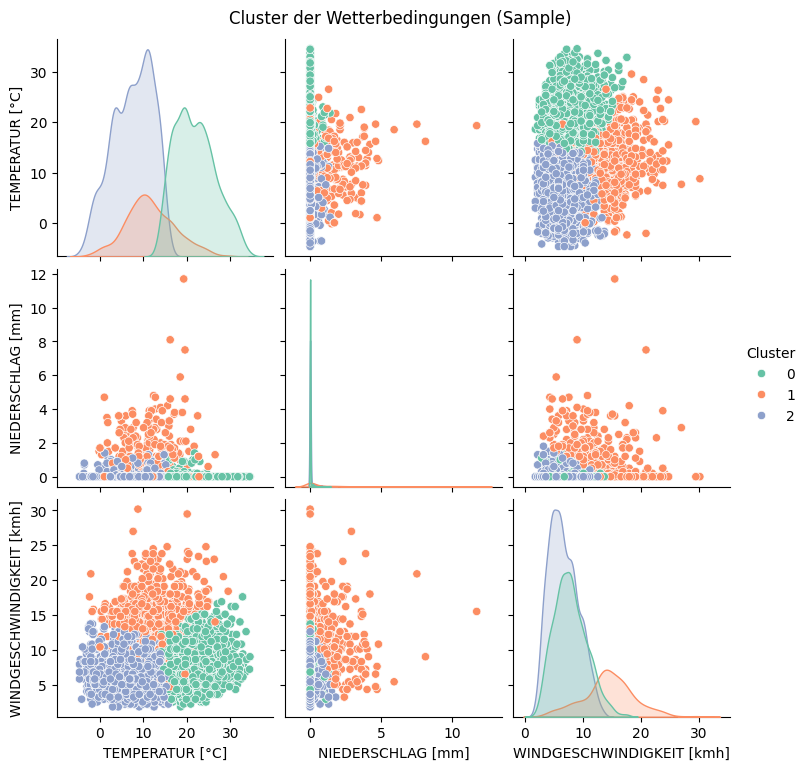

In [ ]:
sns.pairplot(df_clustered.sample(5000, random_state=1),  # z. B. 5.000 zufällige Zeilen - nur 5000 Zeilen, da sonst viel zu lange lädt ;)
             hue='Cluster',
             vars=['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]'],
             palette='Set2')
plt.suptitle("Cluster der Wetterbedingungen (Sample)", y=1.02)
plt.show()

#
#Cluster 0 =
#Cluster 1 =
#Cluster 2 =

In [ ]:
print(kmeans.cluster_centers_)


[[ 1.0285208  -0.22679595 -0.10746333]
 [-0.17409218  1.04665669  1.54353974]
 [-0.72354822 -0.16705706 -0.41850202]]


Cluster 0 = Durchschnittstemperatur von 1 Grad, -0.2mm Niederschlag, -0,1 km/h Wind

       TEMPERATUR [°C]  NIEDERSCHLAG [mm]  WINDGESCHWINDIGKEIT [kmh]  \
count     1.192798e+07       1.192798e+07               1.192798e+07   
mean      1.346758e+01       1.430046e-01               8.303580e+00   
std       8.009958e+00       5.584112e-01               3.982935e+00   
min      -5.100000e+00       0.000000e+00               1.400000e+00   
25%       7.500000e+00       0.000000e+00               5.400000e+00   
50%       1.270000e+01       0.000000e+00               7.600000e+00   
75%       1.930000e+01       0.000000e+00               1.010000e+01   
max       3.460000e+01       1.170000e+01               3.100000e+01   

       BOEENSPITZE_[kmh]  GLOBALSTRAHLUNG [Wm2]  
count       1.192798e+07           1.192798e+07  
mean        1.921581e+01           1.770654e+02  
std         9.917991e+00           2.384233e+02  
min         3.600000e+00          -7.000000e+00  
25%         1.220000e+01           0.000000e+00  
50%         1.690000e+01           6.300000e+01  
7

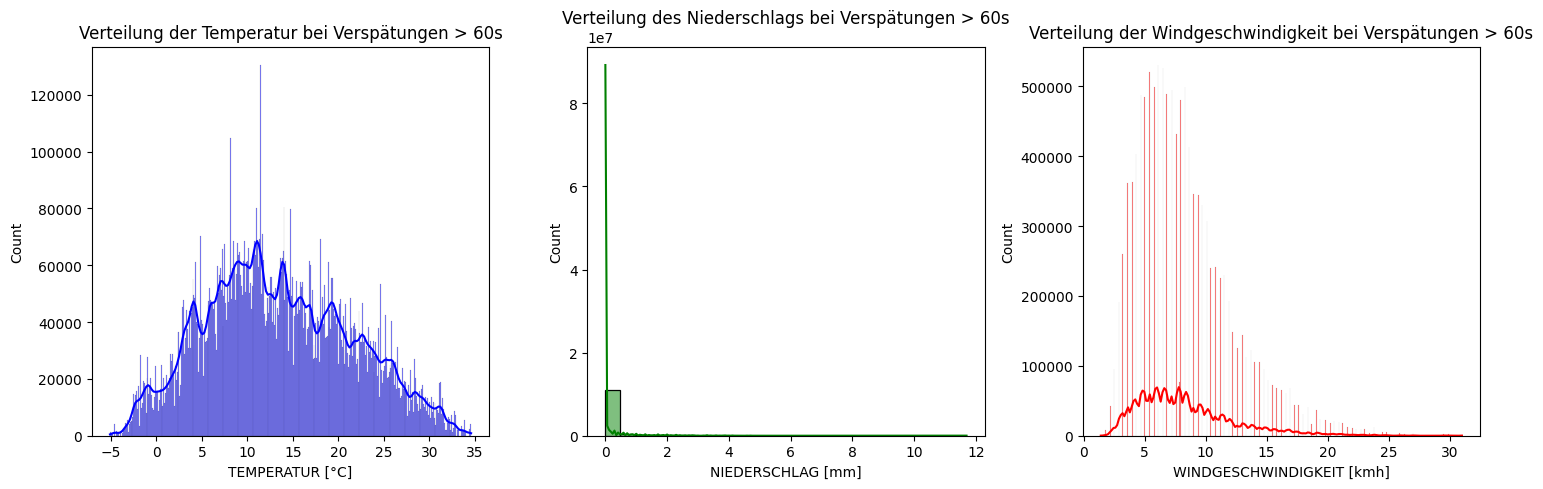

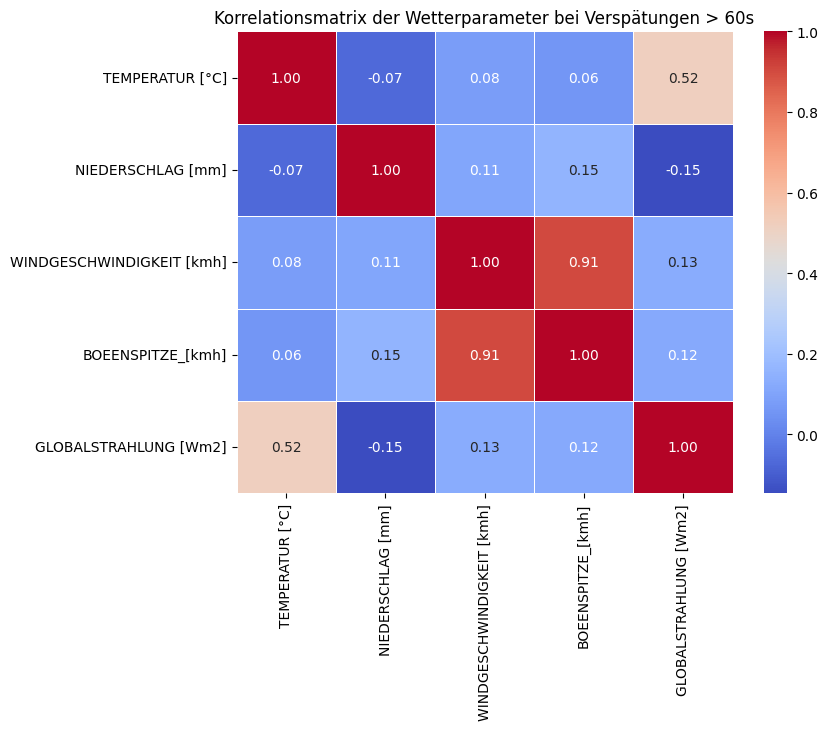

In [ ]:
# Filtere den Datensatz für Verspätungen > 60 Sekunden
df_lange_verspaetungen = df_raw[df_raw['VERSPAETUNG [s]'] > 60] #⚠️ Zuerst prüfen ob überhaupt Werte unter 60sekunden vorhanden sind
# ⚠️ Ist ab 60sekunden bereits lang?


# Zufällige Auswahl von 5000 Zeilen (falls der Datensatz mehr als 5000 Zeilen hat)
#df_sample = df_lange_verspaetungen.sample(n=5000, random_state=1)

# Beschreibende Statistik für Wetterparameter
statistik = df_lange_verspaetungen[['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]',
                                     'BOEENSPITZE_[kmh]', 'GLOBALSTRAHLUNG [Wm2]']].describe()

# Ausgabe der deskriptiven Statistik
print(statistik)

# Visualisierung der Verteilung von Temperatur, Niederschlag und Windgeschwindigkeit bei Verspätungen > 60s
plt.figure(figsize=(15, 5))


#kde  = Fügt eine Kernel Density Estimate (KDE)-Kurve hinzu. Diese Kurve stellt die Dichte der Werte dar, um eine fließende Darstellung der Verteilung zu zeigen, die das Histogramm ergänzt.

# Temperatur
plt.subplot(1, 3, 1)
sns.histplot(df_lange_verspaetungen['TEMPERATUR [°C]'], kde=True, color='blue')
plt.title('Verteilung der Temperatur bei Verspätungen > 60s')

# Niederschlag
plt.subplot(1, 3, 2)
sns.histplot(df_lange_verspaetungen['NIEDERSCHLAG [mm]'], kde=True, color='green')
plt.title('Verteilung des Niederschlags bei Verspätungen > 60s')

# Windgeschwindigkeit
plt.subplot(1, 3, 3)
sns.histplot(df_lange_verspaetungen['WINDGESCHWINDIGKEIT [kmh]'], kde=True, color='red')
plt.title('Verteilung der Windgeschwindigkeit bei Verspätungen > 60s')

plt.tight_layout()
plt.show()

# Optional: Korrelationsmatrix der Wetterdaten bei Verspätungen > 60s
corr_matrix = df_lange_verspaetungen[['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]',
                                      'BOEENSPITZE_[kmh]', 'GLOBALSTRAHLUNG [Wm2]']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelationsmatrix der Wetterparameter bei Verspätungen > 60s')
plt.show()

count: Anzahl der nicht-NaN (fehlenden) Werte in der Spalte.

mean: Durchschnitt (Mittelwert) der Werte.

std: Standardabweichung, die die Streuung der Werte beschreibt.

min: Der kleinste Wert.

25%: Der 25. Perzentilwert (unterer Quartilwert).

50%: Der Median (50. Perzentilwert).

75%: Der 75. Perzentilwert (oberer Quartilwert).

max: Der größte Wert.

X-Achse: Die Werte des Niederschlags in Millimetern (NIEDERSCHLAG [mm]).

Y-Achse: Die Häufigkeit oder Anzahl der Datenpunkte in den jeweiligen Niederschlagsbereichen (also, wie viele Einträge in deinem Datensatz bei einem bestimmten Niederschlagswert auftreten).

KDE-Kurve: Eine glatte Darstellung der Dichte des Niederschlags in deinem Datensatz.

In [ ]:
mittelwert_temperatur = df_raw['TEMPERATUR [°C]'].mean() # ⚠️ Evtl nur von Top 50 wissen?
print(mittelwert_temperatur)

13.467578964118076


In [ ]:
print(df_lange_verspaetungen.shape[0])

11933545


In [ ]:
mittelwert_temperatur = df_lange_verspaetungen['TEMPERATUR [°C]'].mean()
print(mittelwert_temperatur)

# ⚠️ Redundant zum ersten Block

13.467578964118076


In [ ]:
mittelwert_niederschlag = df_lange_verspaetungen['NIEDERSCHLAG [mm]'].mean()
print(mittelwert_niederschlag)

0.14300460404824594


In [ ]:
mittelwert_windgeschwindigkeit = df_lange_verspaetungen['WINDGESCHWINDIGKEIT [kmh]'].mean()
print(mittelwert_windgeschwindigkeit)

8.303579929462995


der Code zur Analyse der Verteilung vom Wetter xy bei Verspätung > 60s ist nicht viel aussagend. Die meisten Werte entsprechen dem Jahresdurchschnitt (Temperatur)


**Datenanalyse Korrleation**

In [ ]:
# Formel Normierung xneu = (x - xmin) / (xmax - xmin)
#MinMax ausrechnen
scaler = MinMaxScaler()

# Nur  Spalten auswählen, die zu normieren sind
spalten = ['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]','WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]' ]

df_norm = df_raw.copy()

# Normierung der Daten
df_norm[spalten] = scaler.fit_transform(df_norm[spalten])

# Ergebnis ansehen
display(df_norm.head())

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] WETTERSTATION  \
0  2024-01-01 04:37:09               REAL             69.0        NABZUE   
1  2024-01-01 04:38:08               REAL             68.0        NABZUE   
2  2024-01-01 04:39:12               REAL             72.0        NABZUE   
3  2024-01-01 04:42:18               REAL            138.0        NABZUE   
4  2024-01-01 04:44:07               REAL            187.0        NABZUE   

   BOEENSPITZE [kmh]  GLOBALSTRAHLUNG [Wm2]  TEMPERATUR [°C]  \
0               50.4                    0.0         0.251889   
1     

In [ ]:
#sortieren nach Abfahrtszeit
df_sorted = df_raw.sort_values(by='ABFAHRTSZEIT' , ascending=True)
top50=df_sorted.tail(50)
display(df_sorted.head())

         LINIEN_TEXT           HALTESTELLEN_NAME         ABFAHRTSZEIT  \
1967839           11        Zürich, Wetlistrasse  2024-03-06 11:00:00   
3745917           15            Zürich, Laubiweg  2024-08-10 09:06:00   
8731403           11  Zürich, Friedhof Enzenbühl  2024-11-22 07:43:00   
8478728           13         Zürich, Sihlquai/HB  2024-03-22 20:27:00   
7296541            2             Zürich, Farbhof  2024-04-19 11:47:00   

                 AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s]  \
1967839  2024-03-06 11:30:00               REAL           1800.0   
3745917  2024-08-10 09:36:00               REAL           1800.0   
8731403  2024-11-22 08:13:00               REAL           1800.0   
8478728  2024-03-22 20:57:00               REAL           1800.0   
7296541  2024-04-19 12:17:00         GESCHAETZT           1800.0   

        WETTERSTATION  BOEENSPITZE [kmh]  GLOBALSTRAHLUNG [Wm2]  \
1967839        NABZUE               14.0                  103.0   
3745917        NAB

In [42]:
fokus = auswahl_sorted[['VERSPAETUNG [s]',  'TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]',  'WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]']]
print(fokus.head())

         VERSPAETUNG [s]  TEMPERATUR [°C]  NIEDERSCHLAG [mm]  \
6817401           1796.0         0.377834           0.042735   
8864364           1797.0         0.327456           0.000000   
1967839           1800.0         0.214106           0.025641   
1989101           1796.0         0.224181           0.025641   
1991698           1800.0         0.221662           0.008547   

         WINDGESCHWINDIGKEIT [kmh]  NEUSCHNEEHOEHE [cm]  
6817401                   0.341216                  0.0  
8864364                   0.391892                  0.0  
1967839                   0.172297                  0.0  
1989101                   0.243243                  0.0  
1991698                   0.233108                  0.0  


In [43]:
# Korrelation zwischen Verspätung und Wetterparametern
korrelation = fokus.corr()

# Ausgabe der Korrelationsmatrix
print(korrelation)

                           VERSPAETUNG [s]  TEMPERATUR [°C]  \
VERSPAETUNG [s]                   1.000000         0.138270   
TEMPERATUR [°C]                   0.138270         1.000000   
NIEDERSCHLAG [mm]                -0.234022        -0.445511   
WINDGESCHWINDIGKEIT [kmh]         0.166921         0.332982   
NEUSCHNEEHOEHE [cm]              -0.271843        -0.516102   

                           NIEDERSCHLAG [mm]  WINDGESCHWINDIGKEIT [kmh]  \
VERSPAETUNG [s]                    -0.234022                   0.166921   
TEMPERATUR [°C]                    -0.445511                   0.332982   
NIEDERSCHLAG [mm]                   1.000000                  -0.072783   
WINDGESCHWINDIGKEIT [kmh]          -0.072783                   1.000000   
NEUSCHNEEHOEHE [cm]                 0.889696                  -0.145270   

                           NEUSCHNEEHOEHE [cm]  
VERSPAETUNG [s]                      -0.271843  
TEMPERATUR [°C]                      -0.516102  
NIEDERSCHLAG [mm]      

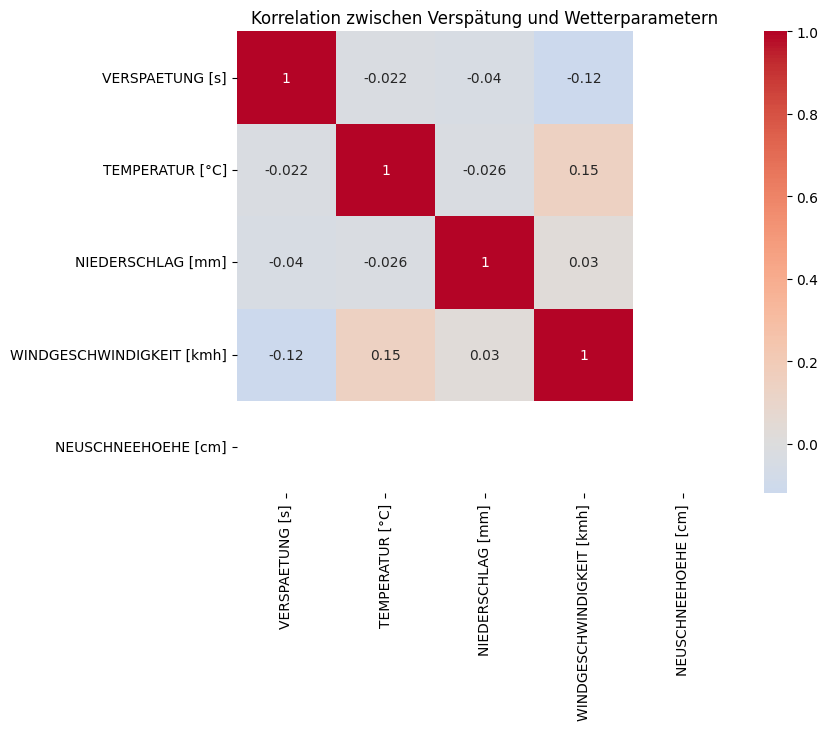

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap der Korrelation erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelation zwischen Verspätung und Wetterparametern')
plt.show()

In [21]:
print(korrelation.head())

                           VERSPAETUNG [s]  TEMPERATUR [°C]  \
VERSPAETUNG [s]                   1.000000        -0.022410   
TEMPERATUR [°C]                  -0.022410         1.000000   
NIEDERSCHLAG [mm]                -0.040487        -0.025549   
WINDGESCHWINDIGKEIT [kmh]        -0.120290         0.150919   
NEUSCHNEEHOEHE [cm]                    NaN              NaN   

                           NIEDERSCHLAG [mm]  WINDGESCHWINDIGKEIT [kmh]  \
VERSPAETUNG [s]                    -0.040487                  -0.120290   
TEMPERATUR [°C]                    -0.025549                   0.150919   
NIEDERSCHLAG [mm]                   1.000000                   0.029764   
WINDGESCHWINDIGKEIT [kmh]           0.029764                   1.000000   
NEUSCHNEEHOEHE [cm]                      NaN                        NaN   

                           NEUSCHNEEHOEHE [cm]  
VERSPAETUNG [s]                            NaN  
TEMPERATUR [°C]                            NaN  
NIEDERSCHLAG [mm]      

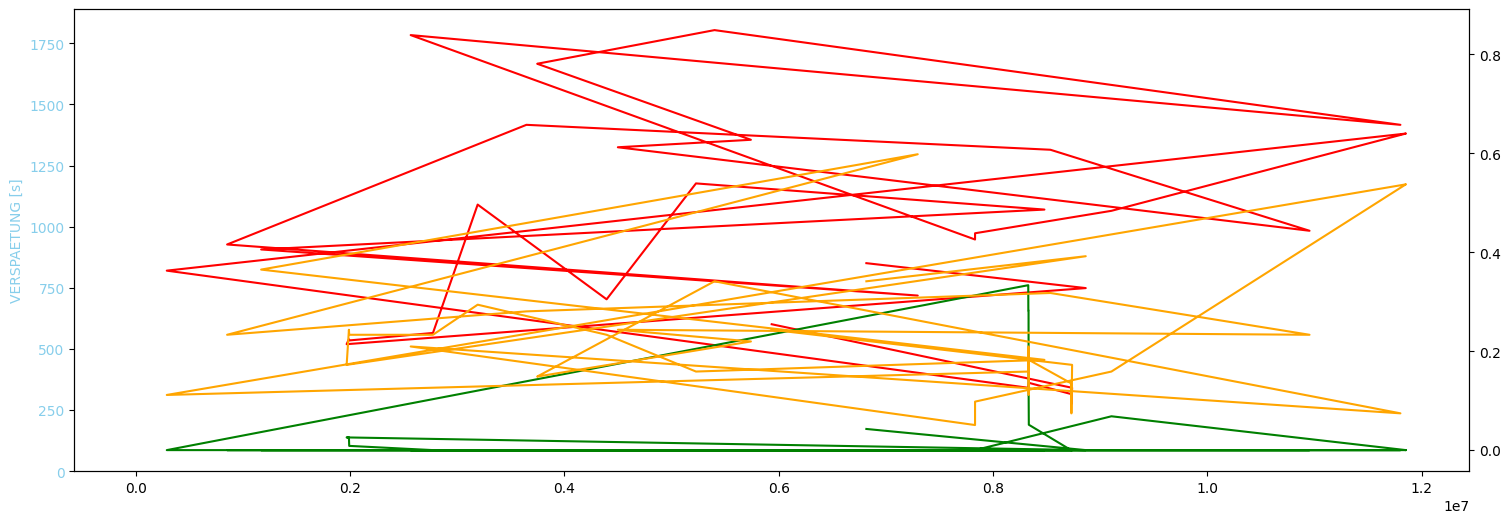

In [49]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(18, 6))
farbe_balken = 'skyblue'
ax1.bar(fokus.index, fokus['VERSPAETUNG [s]'], color=farbe_balken, label='Verspätung [s]')
ax1.set_ylabel('VERSPAETUNG [s]', color=farbe_balken)
ax1.tick_params(axis='y', labelcolor=farbe_balken)

ax2 = ax1.twinx()  # zweite y-Achse teilen
farben = ['red', 'green', 'orange']
ax2.plot(fokus.index, fokus['TEMPERATUR [°C]'], color=farben[0], label='Temperatur (normiert)')
ax2.plot(fokus.index, fokus['NIEDERSCHLAG [mm]'], color=farben[1], label='Niederschlag (normiert)')
ax2.plot(fokus.index, fokus['WINDGESCHWINDIGKEIT [kmh]'], color=farben[2], label='Windgeschwindigkeit (normiert)')